In [1]:
# 현재 디렉토리는 /content이며 이 디렉토리를 기준으로 실습코드와 데이터를 다운로드 합니다. 
!pwd
!rm -rf DLCV
!git clone https://github.com/chulminkw/DLCV.git
# DLCV 디렉토리가 Download되고 DLCV 밑에 Detection과 Segmentation 디렉토리가 있는 것을 확인
!ls -lia 
!ls -lia DLCV

/content
Cloning into 'DLCV'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 234 (delta 32), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (234/234), 142.72 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (89/89), done.
total 20
6160406 drwxr-xr-x 1 root root 4096 May  7 03:53 .
5111896 drwxr-xr-x 1 root root 4096 May  7 03:51 ..
3932175 drwxr-xr-x 4 root root 4096 Apr 21 13:38 .config
5111901 drwxr-xr-x 7 root root 4096 May  7 03:53 DLCV
6160407 drwxr-xr-x 1 root root 4096 Apr 21 13:39 sample_data
total 11016
5111901 drwxr-xr-x 7 root root    4096 May  7 03:53  .
6160406 drwxr-xr-x 1 root root    4096 May  7 03:53  ..
5112053 drwxr-xr-x 2 root root    4096 May  7 03:53  colab_tf115_modify_files
5112056 drwxr-xr-x 6 root root    4096 May  7 03:53  data
5112019 drwxr-xr-x 8 root root    4096 May  7 03:53  Detection
5111995 -rw-r--r-- 1 root root 6567662 May  7 03:53  DLC

# OpenCV를 활용한 Mask RCNN으로 Instance Segmentation 수행
## 1.Tensorflow에서 Pretrained된 Inference 모델 다운로드

In [2]:
!mkdir /content/DLCV/Segmentation/mask_rcnn/pretrained
%cd /content/DLCV/Segmentation/mask_rcnn
!ls -lia

/content/DLCV/Segmentation/mask_rcnn
total 128
5112047 drwxr-xr-x 3 root root  4096 May  7 03:54 .
5112046 drwxr-xr-x 3 root root  4096 May  7 03:53 ..
5112048 -rw-r--r-- 1 root root 27446 May  7 03:53 Balloon_데이터세트_학습및_Segmentation.ipynb
5112049 -rw-r--r-- 1 root root 23953 May  7 03:53 Kaggle_Nucleus_Segmentation_Challenge.ipynb
5112050 -rw-r--r-- 1 root root 15792 May  7 03:53 Matterport패키지를_이용한_Segmentation.ipynb
5112051 -rw-r--r-- 1 root root 25541 May  7 03:53 OpenCV를_이용한_Mask_RCNN_Segmentation.ipynb
5112092 drwxr-xr-x 2 root root  4096 May  7 03:54 pretrained
5112052 -rw-r--r-- 1 root root 19953 May  7 03:53 Tensorflow를_이용한_Mask_RCNN_Segmentation.ipynb


In [11]:
# pretrained 디렉토리에 COCO 데이터셋으로 Pretrained Mask RCNN 다운로드 받기
# config 파일인 .pbtxt 파일도 다운로드
%cd /content/DLCV/Segmentation/mask_rcnn/pretrained/
!wget http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!wget https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt


/content/DLCV/Segmentation/mask_rcnn/pretrained
--2021-05-07 03:58:54--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

mask_rcnn_inception 100%[===================>] 169.58M   270MB/s    in 0.6s    

2021-05-07 03:58:55 (270 MB/s) - ‘mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]

--2021-05-07 03:58:55--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.

In [12]:
# tar 파일 압축풀기
!tar -xvf mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
# config 파일 rename
!mv /content/DLCV/Segmentation/mask_rcnn/pretrained/mask_rcnn*.pbtxt.1 /content/DLCV/Segmentation/mask_rcnn/pretrained/mask_rcnn_inception_v2_coco_2018_01_28/graph.pbtxt
# tar 압축파일 삭제
!rm *.gz

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


In [22]:
!ls /content/DLCV/Segmentation/mask_rcnn/pretrained/mask_rcnn_inception_v2_coco_2018_01_28

checkpoint		   model.ckpt.data-00000-of-00001  pipeline.config
frozen_inference_graph.pb  model.ckpt.index		   saved_model
graph.pbtxt		   model.ckpt.meta


## 2.OpenCV로 이미지 로드

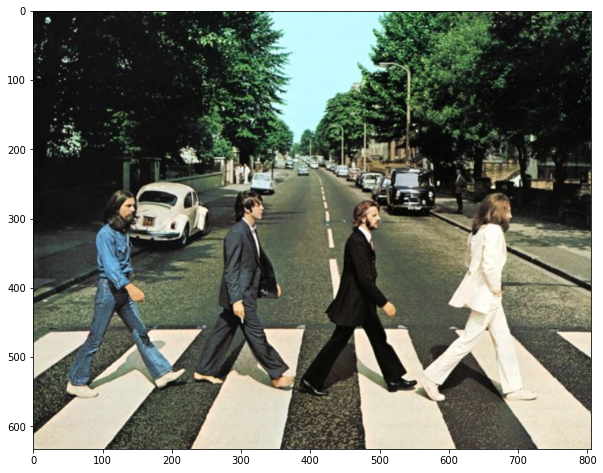

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir, 'data/image/beatles01.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.show()

## Pretrained Masr RCNN Model를 이용해 해당 이미지 Instance Segmentation 수행

In [28]:
default_mask_dir = '/content/DLCV/Segmentation/mask_rcnn'
# Inference 모델과 config 경로 인자로 넣어주기
cv_net = cv2.dnn.readNetFromTensorflow(os.path.join(default_mask_dir, 'pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb'),
                                       os.path.join(default_mask_dir, 'pretrained/mask_rcnn_inception_v2_coco_2018_01_28/graph.pbtxt'))
# 모델에 집어넣기 위해 Image blob
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)
cv_net.setInput(blob)

# Instance Segmentation 수행
# 'detection_out_final'(layer 이름) : Object 클래스 분류, BB 좌표 회귀 결과 
# 'detection_masks'(layer 이름) : 각 픽셀에 대한 Binary Mask Prediction 결과
boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])

In [29]:
# Mask RCNN의 Feature Extractor부터 끝까지 모든 Layer 이름 얻을 수 있음
layer_names = cv_net.getLayerNames()
print(type(layer_names), len(layer_names))
layer_names

<class 'list'> 332


['Preprocessor/mul',
 'Preprocessor/sub',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d/depthwise',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/MaxPool_2a_3x3/MaxPool',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu',
 'FirstStageFeatureExtractor/InceptionV2/I

In [30]:
# COCO 데이터셋 class_id - name 매핑
labels_to_names_seq= {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

# Masking 칼라
colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250],
     [50, 190, 190]])

In [31]:
# Mask RCNN 수행 결과인 boxes 와 masks shape 살펴보기
print('boxes shape:', boxes.shape)
print('masks shape:', masks.shape)

boxes shape: (1, 1, 100, 7)
masks shape: (100, 90, 15, 15)


- ``boxes`` shape 해석 ``(1, 1, 100, 7)``
  - 4차원 shape의 ``(1, 1)`` = 단일 이미지라서 1개 즉, batch size
  - ``(100)``: 해당 이미지에서 찾은 모든 Object 개수들(=Bounding Box 개수들)
  - ``(7)``: 해당 이미지에서 찾은 Object들의 unique한 클래스 개수
<br><br>
- ``masks`` shape 해석 ``(100, 90, 15, 15)``
  - ``(100)``: 해당 이미지에서 찾은 모든 Object 개수들
  - ``(90)``: 찾은 모든 Object들의 각 Object에 대한 클래스 Softmax 확률값 벡터
    - COCO Dataset이기 때문에 90개임!
  - ``(15, 15)``: 각 Object의 90개 클래스 확률 중 각 클래스에 대한 Masking 값들
    - 이 때 Masking 값들은 원래 ``0~255``값 사이지만 ``0~1``사이로 scale되어 있음

## Instance Segmentation 결과 시각화

In [38]:
numClasses = masks.shape[1]  # COCO Dataset의 클래스 개수인 90!
numDetections = boxes.shape[2]  # 해당 이미지에 대해 찾은 모든 Object들 개수

# 시각화할 이미지 copy
draw_img = img.copy()

img_height = draw_img.shape[0]
img_width = draw_img.shape[1]

conf_threshold = 0.5  # 특정 Class일 확률 * GT와의 IoU값
mask_threshold = 0.3  # Segmentation결과 mask값이 0.3이상이면 1, 이하면 0으로 정할 임곗값

green_color = (0, 255, 0)
red_color = (0, 0, 255)

# 1개의 Object에 대해서만 테스트
for i in range(1):
  # boxes shape : (1, 1, 100, 90), masks shape : (100, 90, 15, 15)
  box = boxes[0, 0, i]  #size가 7인 벡터: [?, class_id, conf_score, x1, y1, x2, y2]
  mask = masks[i]
  score = box[2] 
  if score > conf_threshold:
    classId = int(box[1])
    # 좌표로 나타낼 때는 width가 x좌표, height가 y좌표임
    left = int(img_width * box[3])
    top = int(img_height * box[4]) 
    right = int(img_width * box[5])
    bottom = int(img_height * box[6])

    caption = f"{labels_to_names_seq[classId]}-{score: .3f}"
    cv2.rectangle(draw_img, (left, top), (right, bottom),
                  green_color, thickness=2)
    cv2.putText(draw_img, caption, (left, top-3), cv2.FONT_HERSHEY_COMPLEX,
                0.3, red_color, 1)
    
    ### Masking 시각화하기 ###
    ## 1. 해당 Object 클래스에 대한 Masking 정보 추출 ##
    # masks의 i번째 인덱스에 있는 (90, 15, 15)에서 classId 인덱스에 있는 값이 해당 클래스에 대한 마스킹 정보 벡터
    classMask = mask[classId]
    print('Detected된 classMask shape:', classMask.shape)

    ## 2. 추출한 Masking 정보를 원본 Object 이미지 사이즈 만큼 복구 ## -> Q.왜 이런 사이즈를 사용..?
    scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
    print('원본 이미지 비율로 resize된 classMask shape:', scaled_classMask.shape)

    ## 3. Masking 값들 중 지정된 Mask Threshold 이상인 픽셀값들만 True로 지정 ##
    s_mask_b = (scaled_classMask > mask_threshold)
    print('Scaled Mask shape:', s_mask_b.shape)
    print('Scaled True Mask shape:', s_mask_b[s_mask_b==True].shape)
    print('Scaled False Mask shape:', s_mask_b[s_mask_b==False].shape)

    ## 4. Mask를 적용하기 위해 Object Detection으로 찾은 바운딩 박스만큼의 이미지 추출
    before_mask_roi = draw_img[top:bottom+1, left:right+1]  # 이미지에서 추출할 때는 shape[0]이 높이, shape[1]이 너비
    print('before_mask_roi:', before_mask_roi.shape)


Detected된 classMask shape: (15, 15)
원본 이미지 비율로 resize된 classMask shape: (284, 140)
Scaled Mask shape: (284, 140)
Scaled True Mask shape: (19429,)
Scaled False Mask shape: (20331,)
before_maks_roi: (284, 140, 3)


In [45]:
# Detected된 Object에 Mask 적용 후 시각화

# True/False값을 픽셀 숫자값으로 변형
vis_mask = (s_mask_b * 255).astype('uint8')
print(vis_mask.shape, vis_mask[vis_mask >= 1].shape)

instance = cv2.bitwise_and(before_mask_roi, before_mask_roi,
                           mask=vis_mask)

(284, 140) (19429,)


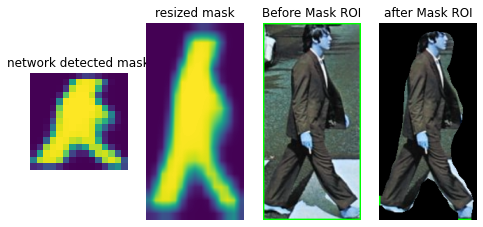

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(8, 8),
                                         ncols=4, nrows=1)
ax1.set_title('network detected mask')
ax1.axis('off')
ax1.imshow(classMask)

ax2.set_title('resized mask')
ax2.axis('off')
ax2.imshow(scaled_classMask)


ax3.set_title('Before Mask ROI')
ax3.axis('off')
ax3.imshow(before_mask_roi)

ax4.set_title('after Mask ROI')
ax4.axis('off')
ax4.imshow(instance)

[245, 145, 50]


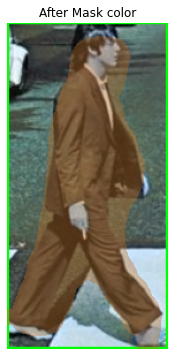

In [47]:
colorIndex = np.random.randint(0, len(colors)-1)
color = colors[colorIndex]
print(color)
after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]
draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

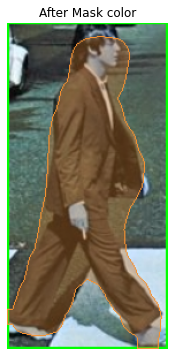

In [48]:
s_mask_i = s_mask_b.astype(np.uint8)
# https://datascienceschool.net/view-notebook/f9f8983941254a34bf0fee42c66c5539/ 에 이미지 컨투어 설명 있음 
contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(draw_img[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

## 여러 메소드로 분할

In [49]:
def get_box_info(box, img_width, img_height):
  classId = int(box[1])
  left = int(img_width * box[3])
  top = int(img_height * box[4])
  right = int(img_width * box[5])
  bottom = int(img_height * box[6])

  return classId, left, top, right, bottom

def draw_box(img_array, box, img_width, img_height, is_print=False):
  green_color = (0, 255 ,0)
  red_color =(0, 0, 255)

  score = box[2]
  classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
  caption = f"{labels_to_names_seq[classId]}:{score: .2f}"

  if is_print:
    print("box:", box, "score:", socre, "classId:", classId)
  
  cv2.rectangle(img_array, (left, top), (right, bottom), green_color, thickness=2)
  cv2.putText(img_array, caption, (left, top - 3), cv2.FONT_HERSHEY_COMPLEX,
              0.5, red_color, thickness=1)
  
  return img_array

def draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=False):
  classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
  # 1. 마스킹 정보 추출
  classMask = mask[classId]
  # 2. 마스킹 사이즈 복구
  scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
  s_mask_b = (scaled_classMask > mask_threshold)
  before_mask_roi = img_array[top:bottom+1, left:right+1]

  # 3. 마스킹 적용할 바운딩 박스 영역 추출하고 color 적용
  colorIndex = np.random.randint(0, len(colors)-1)
  color = colors[colorIndex]
  after_mask_roi = img_array[top:bottom+1, left:right+1][s_mask_b]
  img_array[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)

  # 4. 마스킹 적용한 부분에 윤곽선 입히기
  s_mask_i = s_mask_b.astype(np.uint8)
  contours, hierarchy = cv2.findContours(s_mask_i, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(img_array[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

  return img_array


In [51]:
import time

def detect_image_mask_rcnn(cv_net, img_array, conf_threshold, mask_threshold, use_copied_array=True, is_print=False):

  draw_img = None
  if use_copied_array:
    draw_img = img_array.copy()
  else:
    draw_img = img_array
  
  start_time = time.time()
  # 이미지 블롭후 Pretrained Model에 넣기
  blob = cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False)
  cv_net.setInput(blob)
  boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])

  inference_time = time.time() - start_time
  if is_print:
    print("Segmentation Inference time:", inference_time)
  
  numClasses = masks.shape[1]
  numDetections = boxes.shape[2]

  img_height = img_array.shape[0]
  img_width = img_array.shape[1]

  for i in range(numDetections):
    box = boxes[0, 0, i]
    mask = masks[i]
    score = box[2]

    if score > conf_threshold:
      draw_box(img_array, box, img_width, img_height, is_print=False)
      draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=False)

  return img_array

Segmentation Inference time: 6.425765514373779


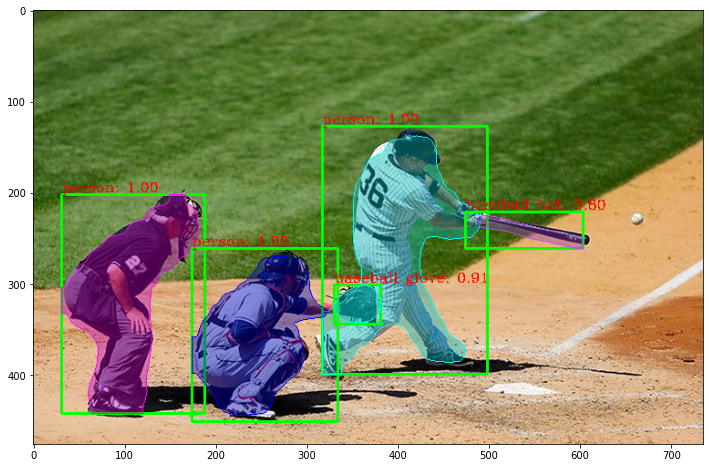

In [52]:
default_dir = '/content/DLCV'
img = cv2.imread(os.path.join(default_dir,'data/image/baseball01.jpg'))

cv_net = cv2.dnn.readNetFromTensorflow(os.path.join(default_mask_dir, 'pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb'),
                                       os.path.join(default_mask_dir, 'pretrained/mask_rcnn_inception_v2_coco_2018_01_28/graph.pbtxt'))

img_detected = detect_image_mask_rcnn(cv_net, img, conf_threshold=0.5, mask_threshold=0.3, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## 영상에 Instance Segmentation 적용

In [53]:
def detect_video_mask_rcnn(cv_net, input_path, output_path, conf_threshold, mask_threshold,  is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, 24, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    frame_index=0
    while True:
        hasFrame, img_frame = cap.read()
        frame_index += 1
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        print("frame index:{0:}".format(frame_index), end=" ")
        returned_frame = detect_image_mask_rcnn(cv_net, img_frame, conf_threshold=conf_threshold,
                                                mask_threshold=mask_threshold,use_copied_array=False, is_print=is_print)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()